In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Venkataraman_Ranganath_Customers.csv')
df2 = pd.read_csv('Venkataraman_Ranganath_Transactions.csv')

### Load the dataframes

In [3]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Check for null values

In [5]:
df1.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
df2.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

### Merge the dataframes for clustering(utilise both data)

In [7]:
merged_df = pd.merge(df1, df2, on='CustomerID')
merged_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [8]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])

In [9]:
# merged_df['Year'] = merged_df['TransactionDate'].dt.year
# merged_df['Month'] = merged_df['TransactionDate'].dt.month
# merged_df['Date'] = merged_df['TransactionDate'].dt.date
# merged_df['Hour'] = merged_df['TransactionDate'].dt.hour
# merged_df['Minute'] = merged_df['TransactionDate'].dt.minute
# merged_df['Second'] = merged_df['TransactionDate'].dt.second

# Data Cleaning & Pre Processing

### Drop irrelevant ID columns as they arent meaningful

In [10]:
merged_df.drop(columns=['TransactionID', 'ProductID', 'CustomerID'], inplace=True)
merged_df

,CustomerName,Region,SignupDate,TransactionDate,Quantity,TotalValue,Price
0,Lawrence Carroll,South America,2022-07-10,2024-01-19 03:12:55,2,114.60,57.30
1,Lawrence Carroll,South America,2022-07-10,2024-09-17 09:01:18,3,412.62,137.54
2,Lawrence Carroll,South America,2022-07-10,2024-04-08 00:01:00,2,614.94,307.47
3,Lawrence Carroll,South America,2022-07-10,2024-05-07 03:11:44,2,911.44,455.72
4,Lawrence Carroll,South America,2022-07-10,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...
995,Kelly Cross,Asia,2023-06-11,2024-12-11 03:05:50,4,868.20,217.05
996,Kelly Cross,Asia,2023-06-11,2024-04-27 19:06:20,1,239.70,239.70
997,Kelly Cross,Asia,2023-06-11,2024-07-15 20:36:28,4,627.84,156.96
998,Kelly Cross,Asia,2023-06-11,2024-09-10 09:50:48,4,1665.60,416.40


### Label Encode categorical columns (Name & Region)

In [11]:
merged_df['CustomerName'] = merged_df['CustomerName'].astype('category').cat.codes
merged_df

,CustomerName,Region,SignupDate,TransactionDate,Quantity,TotalValue,Price
0,118,South America,2022-07-10,2024-01-19 03:12:55,2,114.60,57.30
1,118,South America,2022-07-10,2024-09-17 09:01:18,3,412.62,137.54
2,118,South America,2022-07-10,2024-04-08 00:01:00,2,614.94,307.47
3,118,South America,2022-07-10,2024-05-07 03:11:44,2,911.44,455.72
4,118,South America,2022-07-10,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...
995,105,Asia,2023-06-11,2024-12-11 03:05:50,4,868.20,217.05
996,105,Asia,2023-06-11,2024-04-27 19:06:20,1,239.70,239.70
997,105,Asia,2023-06-11,2024-07-15 20:36:28,4,627.84,156.96
998,105,Asia,2023-06-11,2024-09-10 09:50:48,4,1665.60,416.40


In [12]:
merged_df['Region'] = merged_df['Region'].astype('category').cat.codes
merged_df

,CustomerName,Region,SignupDate,TransactionDate,Quantity,TotalValue,Price
0,118,3,2022-07-10,2024-01-19 03:12:55,2,114.60,57.30
1,118,3,2022-07-10,2024-09-17 09:01:18,3,412.62,137.54
2,118,3,2022-07-10,2024-04-08 00:01:00,2,614.94,307.47
3,118,3,2022-07-10,2024-05-07 03:11:44,2,911.44,455.72
4,118,3,2022-07-10,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...
995,105,0,2023-06-11,2024-12-11 03:05:50,4,868.20,217.05
996,105,0,2023-06-11,2024-04-27 19:06:20,1,239.70,239.70
997,105,0,2023-06-11,2024-07-15 20:36:28,4,627.84,156.96
998,105,0,2023-06-11,2024-09-10 09:50:48,4,1665.60,416.40


### Merge Signup and Transaction date into a single column

In [13]:
merged_df['DaysSinceSignup'] = (merged_df['TransactionDate'] - merged_df['SignupDate']).dt.days
merged_df.drop(columns=['SignupDate', 'TransactionDate','CustomerName'], inplace=True)
merged_df

,Region,Quantity,TotalValue,Price,DaysSinceSignup
0,3,2,114.60,57.30,558
1,3,3,412.62,137.54,800
2,3,2,614.94,307.47,638
3,3,2,911.44,455.72,667
4,3,3,1300.92,433.64,846
...,...,...,...,...,...
995,0,4,868.20,217.05,549
996,0,1,239.70,239.70,321
997,0,4,627.84,156.96,400
998,0,4,1665.60,416.40,457


### Scaling numerical data

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [15]:
numerical_features = ['Quantity', 'TotalValue', 'Price', 'DaysSinceSignup']

# Apply scaling (standardization)
scaler = MinMaxScaler()
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])
merged_df

,Region,Quantity,TotalValue,Price,DaysSinceSignup
0,3,0.333333,0.049885,0.085575,0.639427
1,3,0.666667,0.200784,0.252159,0.812903
2,3,0.333333,0.303226,0.604945,0.696774
3,3,0.333333,0.453356,0.912722,0.717563
4,3,0.666667,0.650565,0.866883,0.845878
...,...,...,...,...,...
995,0,1.000000,0.431462,0.417227,0.632975
996,0,0.000000,0.113228,0.464250,0.469534
997,0,1.000000,0.309758,0.292476,0.526165
998,0,1.000000,0.835217,0.831091,0.567025


### For Clustering, we choose Gaussian Mixture Models Algorithm

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

features = merged_df.select_dtypes(include=['float64', 'int16','int8']).columns
X = merged_df[features]
X

,Region,Quantity,TotalValue,Price,DaysSinceSignup
0,3,0.333333,0.049885,0.085575,0.639427
1,3,0.666667,0.200784,0.252159,0.812903
2,3,0.333333,0.303226,0.604945,0.696774
3,3,0.333333,0.453356,0.912722,0.717563
4,3,0.666667,0.650565,0.866883,0.845878
...,...,...,...,...,...
995,0,1.000000,0.431462,0.417227,0.632975
996,0,0.000000,0.113228,0.464250,0.469534
997,0,1.000000,0.309758,0.292476,0.526165
998,0,1.000000,0.835217,0.831091,0.567025


In [17]:
cluster_range = range(2, 11)

bic_scores = []
silhouette_scores = []
db_indices = []


for n_clusters in cluster_range:
    # Fit Gaussian Mixture Model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute Davies-Bouldin Index
    db_index = davies_bouldin_score(X, labels)
    db_indices.append(db_index)

c:\Users\rkven\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rkven\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rkven\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rkven\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
print("Silhouette Scores:")
print(silhouette_scores)

print("\nDavies-Bouldin Index Scores:")
print(db_indices)

Silhouette Scores:
[0.5132472719768632, 0.3843527977351816, 0.4021628098999966, 0.37452831105991075, 0.3401419389360128, 0.3303137824604775, 0.339071299535923, 0.33402242818350186, 0.33614331577439577]

Davies-Bouldin Index Scores:
[0.7491952602514435, 1.0339162638622295, 1.118203998105577, 1.162146441893446, 1.3011062602207255, 1.2453059264078423, 1.2251751930993167, 1.2034301621010737, 1.1270200694429293]


### FOR NUMBER OF CLUSTERS = 2
#### METRICS SCORES:
#### SILHOUETTE SCORE: 0.513 closer to 1 indicates that the clusters are formed well but small overlap is there
#### DB INDEX: 0.74 closer to 1, indicates clusters are somewhat well separated but small overlap is there

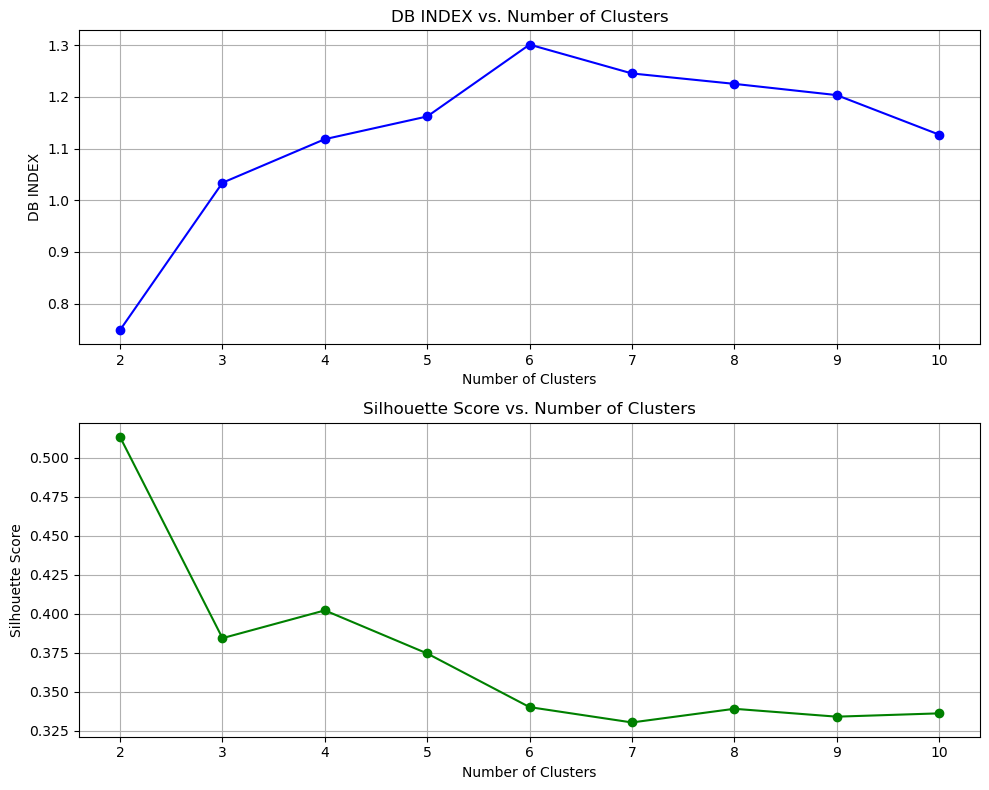

In [19]:
# Plot metrics for evaluation
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot BIC
axes[0].plot(cluster_range, db_indices, marker='o', linestyle='-', color='b')
axes[0].set_title('DB INDEX vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('DB INDEX')
axes[0].grid(True)

# Plot Silhouette Scores
axes[1].plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
axes[1].set_title('Silhouette Score vs. Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## CLUSTER VISUALIZATION FOR N=2

c:\Users\rkven\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


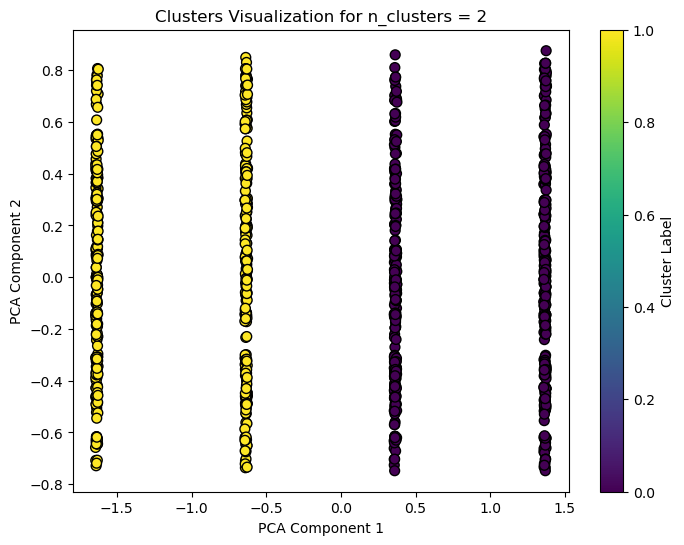

In [21]:
from sklearn.decomposition import PCA


n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Clusters Visualization for n_clusters = {n_clusters}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()